# **Capstone Project - Movie Recommendation System Development**: 🎓📊


---


# **Setting Up the Environment** 🛠️

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# change path to Recommendation_Systems_Data
import os
os.chdir('/content/drive/MyDrive/Recommendation_Systems_Data')

In [3]:
!ls

GoodReads_100k_books.csv		     requirements.txt
item_item_similarity_heatmap_pearson_50.png  rmse_comparison.xlsx
item_item_similarity_heatmap_pearson.png     tags.csv
links.csv				     tfidf_matrix.csv
movies.csv				     User_item_similarity_heatmap_cosine.png
ratings.csv


##Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from tqdm import tqdm

In [8]:
import warnings
warnings.filterwarnings("ignore")

Save requirements ...

In [9]:
!pip3 freeze > requirements.txt

##Load the DataSet

In [10]:
# Load the ratings and movies data
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

##Set Plot Style



In [11]:
sns.set_theme(style='whitegrid')
sns.set_palette("viridis")

# 🎯 **EDA and Preprocessing** 🔍




## >> Display ratings and movies datasets

In [12]:
print("-------------------> Ratings Data : ")
display(ratings)
print("#########################################################################################")
print("-------------------> Movies Data : ")
display(movies)

-------------------> Ratings Data : 


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


#########################################################################################
-------------------> Movies Data : 


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## >> Merge the ratings data with movie data based on movieId


In [13]:
data = pd.merge(ratings, movies, on='movieId', how='inner')
display(data)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


> convert timestamp to pd_datetime

In [15]:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
 4   title      100836 non-null  object        
 5   genres     100836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


> Summary statistics of numerical columns

In [17]:
data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,100836
mean,326.127564,19435.295718,3.501557,2008-03-19 17:01:27.368469248
min,1.000000,1.000000,0.500000,1996-03-29 18:36:55
25%,177.000000,1199.000000,3.000000,2002-04-18 09:57:46
50%,325.000000,2991.000000,3.500000,2007-08-02 20:31:02
75%,477.000000,8122.000000,4.000000,2015-07-04 07:15:44.500000
max,610.000000,193609.000000,5.000000,2018-09-24 14:27:30
std,182.618491,35530.987199,1.042529,NaN


## >> Check for duplicates , missing values in our data ...

In [18]:
#count duplicates
data.duplicated().sum()

#print count of duplicated and there percentage
print(f"duplicates in the data ---->",data.duplicated().sum(),f", {data.duplicated().sum()/len(data)*100}% of the data")

duplicates in the data ----> 0 , 0.0% of the data


In [19]:
#check for NaNs
data.isna().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0


<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍  

</h1>

There is no duplicates or missing values in our data ....

---




## >> Rating Distribution

In [20]:
# Display the average rating
print(f"Average Rating -----> {ratings['rating'].mean()}")

Average Rating -----> 3.501556983616962


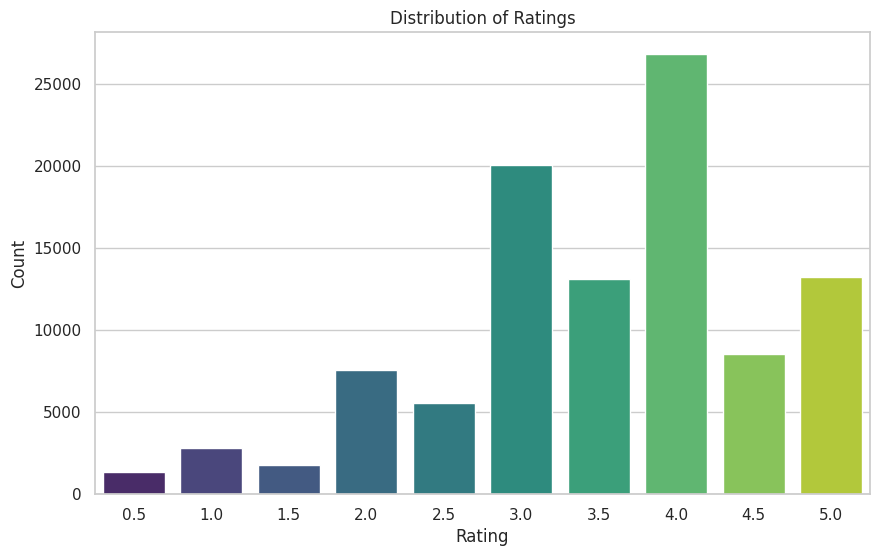

In [21]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### >> Genre distribution

* Split the genres by the pipe | separator.
* Count how many times each genre appears across all movies.
* Visualize the top n most frequent genres

In [22]:
def genre_distribution(top_n=10):

  # Genre distribution using value_counts
  genre_split = data['genres'].str.split('|').explode().value_counts()
  print("\nGenre Distribution:")
  display(genre_split)

  # Visualize the top_n genres
  top_genres = genre_split.head(top_n).reset_index()
  top_genres.columns = ['genre', 'count']  # Rename columns for clarity

  plt.figure(figsize=(10, 6))
  sns.barplot(x='count', y='genre', data=top_genres, palette='Blues_d', edgecolor='black')

  # Customizing the plot
  plt.title(f'Top {top_n} Genres Distribution', fontsize=16)
  plt.xlabel('Count', fontsize=14)
  plt.ylabel('Genres', fontsize=14)
  plt.xticks(rotation=45, fontsize=12)
  plt.grid(True)

  # Show the plot
  plt.tight_layout()
  plt.show()



Genre Distribution:


,count
genres,
Drama,41928
Comedy,39053
Action,30635
Thriller,26452
Adventure,24161
Romance,18124
Sci-Fi,17243
Crime,16681
Fantasy,11834


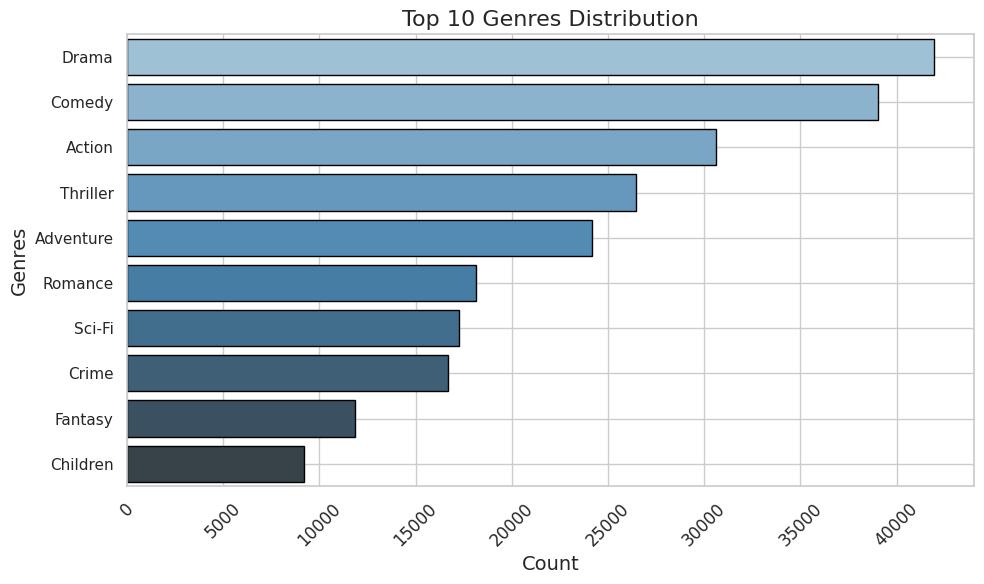

In [23]:
genre_distribution(top_n=10)

## >> Most Rated Movies (Movie Popularity)

In [24]:
def most_rated_movies(top_n=10):
  # Count the number of ratings per movie
  movie_ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

  # Merge with movie details to get movie titles
  movie_details = pd.merge(movie_ratings_count, movies, on='movieId', how='left')

  # Get top_n most rated movies
  top_rated_movies = movie_details.sort_values('rating_count', ascending=False).head(top_n)

  # Visualize the top_n most rated movies
  plt.figure(figsize=(18, 8))
  sns.barplot(x='rating_count', y='title', data=top_rated_movies, palette='viridis')
  plt.title('Top 10 Most Rated Movies')
  plt.xlabel('Number of Ratings')
  plt.ylabel('Movie Title')
  plt.show()


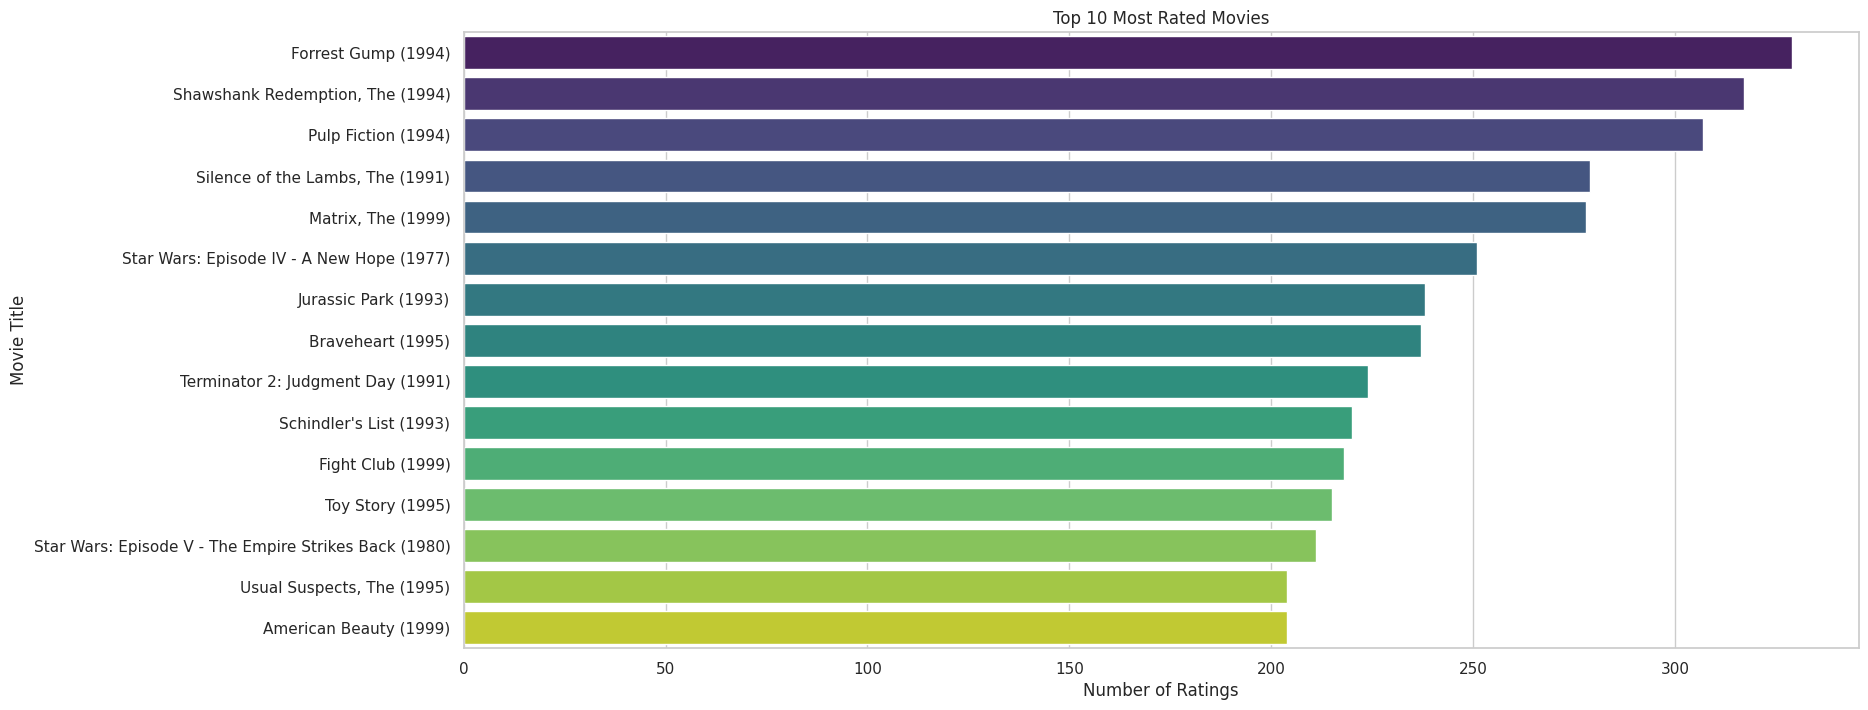

In [25]:
most_rated_movies(15)

## >> Time-Based Analysis of Ratings

* how the number of ratings has changed over time

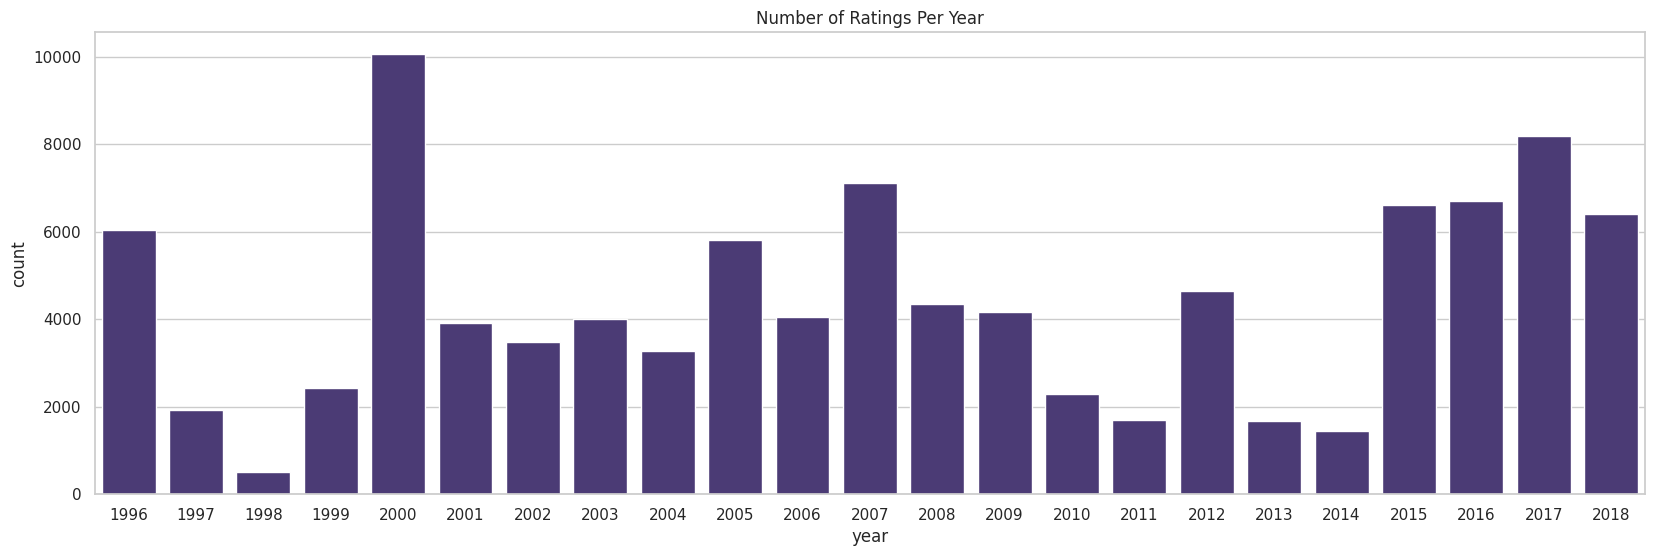

In [26]:
#getting year from timestamp
data['year'] = data['timestamp'].dt.year

# Ratings per year
plt.figure(figsize=(20, 6))
sns.countplot(x='year', data=data)
plt.title('Number of Ratings Per Year')
plt.show()

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍  Insights :

</h1>

* Popular Genres:
 * Drama, comedy then action are the mose frequent genres in the dataset

* Movie Popularity:
 * Forrest Gump then the shawshank redemtion have the most ratings (numbers)

* Rating Patterns:
 * in last 4 years starts to be kinda fixed about 7500 in year


* ratings :
 * most people ratings is between  3----4


---

## >> Split the data (80-20) using time stamp

> to be tried using it after stratification ..

In [27]:
def split_data_by_timestamp(df, test_size=0.2):
    # Sort the data by timestamp
    df = df.sort_values(by='timestamp')

    # Calculate the split index based on the test size
    split_index = int(len(df) * (1 - test_size))

    # Create training and testing sets
    train_data = df.iloc[:split_index]
    test_data = df.iloc[split_index:]

    return train_data, test_data


In [28]:
#train_data, test_data = split_data_by_timestamp(df=data, test_size=0.2)

## >>  Split the Data (80-20) with Stratification
We'll stratify by userId to ensure that each user’s ratings are represented in both the training and test sets.



> Sorting using timestamp




In [29]:
# Stratify the split by 'userId' ... 80% train and 20 % test
train_data, test_data = train_test_split(data, test_size=0.2,random_state=42, stratify=data['userId'])

In [30]:
# Display the number of rows in the train and test sets to verify
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Training set size: 80668
Test set size: 20168


In [31]:
train_data = train_data.reset_index(drop=True)

In [32]:
test_data = test_data.reset_index(drop=True)

In [33]:
train_data

,userId,movieId,rating,timestamp,title,genres,year
0,140,4234,3.0,2002-01-31 19:39:05,"Tailor of Panama, The (2001)",Drama|Thriller,2002
1,156,2080,1.0,2000-02-21 06:05:18,Lady and the Tramp (1955),Animation|Children|Comedy|Romance,2000
2,380,182639,4.0,2018-09-13 21:38:26,The Second Renaissance Part II (2003),Animation|Sci-Fi,2018
3,495,5254,3.5,2016-03-22 08:44:28,Blade II (2002),Action|Horror|Thriller,2016
4,610,69134,3.0,2017-05-03 21:49:32,Antichrist (2009),Drama|Fantasy,2017
...,...,...,...,...,...,...,...
80663,318,136024,3.0,2016-02-19 12:50:25,The Professional: Golgo 13 (1983),Action|Animation|Crime,2016
80664,432,5507,1.5,2011-09-05 17:11:50,xXx (2002),Action|Crime|Thriller,2011
80665,474,4012,2.0,2003-03-05 18:07:37,Punchline (1988),Comedy|Drama,2003
80666,510,497,1.5,2006-02-28 20:33:29,Much Ado About Nothing (1993),Comedy|Romance,2006


## >>  Create the User-Item Matrix

* using `aggfunc='mean'` ensures that if there are any duplicate ratings {in our data there is no duplicates we checked it ....}
* setting fill_value=0 will replace missing values (NaNs) with 0

In [34]:
# Create the user-item matrix
user_item_matrix_train = train_data.pivot_table(index='userId', columns='movieId', values='rating', aggfunc='mean', fill_value=0)

In [35]:
user_item_matrix_train

movieId,1,2,3,4,5,6,7,8,9,10,...,190219,190221,193565,193567,193571,193579,193581,193583,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 🎯 **Requirement 2.1: Implement User-Based Collaborative Filtering** 🔍
**Requirements:**


* Compute user-user similarity using cosine similarity.
* Generate movie recommendations for a specific user based on the top-5 most similar users.
* Evaluate the recommendations using precision and recall metrics.

## >> Compute Cosine Similarity Between Users ...

In [36]:
# Compute the cosine similarity matrix between users
users_cosine_similarity_matrix = cosine_similarity(user_item_matrix_train)

In [37]:
# Convert to DataFrame for easier handling
users_cosine_similarity_df = pd.DataFrame(users_cosine_similarity_matrix, index=user_item_matrix_train.index, columns=user_item_matrix_train.index)

In [38]:
users_cosine_similarity_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.033978,0.052314,0.164108,0.055953,0.099364,0.147394,0.115757,0.031976,0.018473,...,0.070319,0.122131,0.178190,0.042923,0.116958,0.140293,0.221153,0.251281,0.050435,0.132139
2,0.033978,1.000000,0.000000,0.000000,0.020710,0.032015,0.005312,0.033325,0.000000,0.031717,...,0.119480,0.020645,0.006888,0.000000,0.000000,0.029299,0.016038,0.049508,0.034847,0.074200
3,0.052314,0.000000,1.000000,0.000000,0.005856,0.004656,0.000000,0.000000,0.000000,0.000000,...,0.003314,0.005604,0.025968,0.000000,0.000000,0.006298,0.004354,0.017463,0.000000,0.026366
4,0.164108,0.000000,0.000000,1.000000,0.107156,0.097863,0.112174,0.053010,0.014257,0.017360,...,0.075926,0.118650,0.227765,0.048529,0.061314,0.153277,0.093818,0.129607,0.040232,0.089303
5,0.055953,0.020710,0.005856,0.107156,1.000000,0.245701,0.091445,0.383903,0.000000,0.018691,...,0.044560,0.352043,0.085981,0.168112,0.099577,0.072495,0.131710,0.104528,0.243444,0.042861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.140293,0.029299,0.006298,0.153277,0.072495,0.083990,0.181629,0.075775,0.069877,0.059946,...,0.138786,0.092216,0.247787,0.059694,0.108882,1.000000,0.119427,0.218884,0.046624,0.159914
607,0.221153,0.016038,0.004354,0.093818,0.131710,0.136342,0.138288,0.162483,0.000000,0.009805,...,0.092394,0.167404,0.181703,0.093084,0.096976,0.119427,1.000000,0.224897,0.132737,0.113584
608,0.251281,0.049508,0.017463,0.129607,0.104528,0.139592,0.248780,0.165046,0.102516,0.054096,...,0.133021,0.160919,0.183748,0.141817,0.142140,0.218884,0.224897,1.000000,0.104291,0.276224




> Heatmap for User sisimilarity using (cosine_similarity method ...)


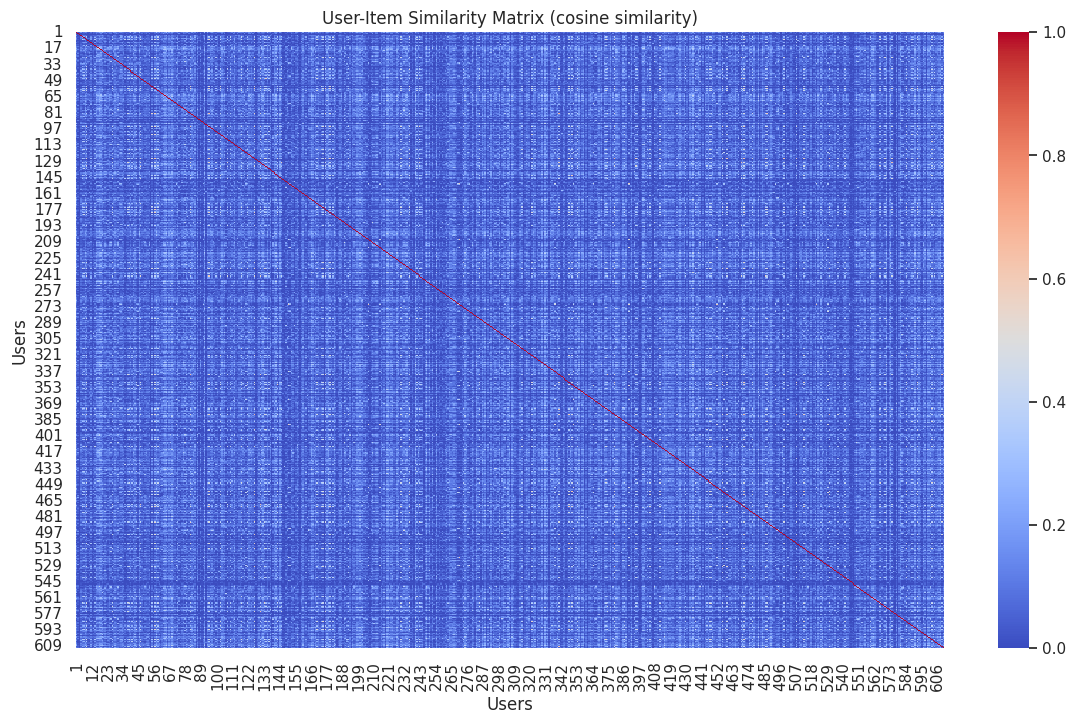

In [39]:
# Plot a heatmap for the User-item similarity matrix
plt.figure(figsize=(14, 8))
sns.heatmap(users_cosine_similarity_df, cmap='coolwarm', annot=False, cbar=True)

# Add titles and axis labels
plt.title('User-Item Similarity Matrix (cosine similarity)')
plt.xlabel('Users')
plt.ylabel('Users')

# Save the heatmap as an image
plt.savefig('User_item_similarity_heatmap_cosine.png')
plt.show()

## >> Generate movie recommendations for a specific user based on the top-5 most similar user

### >> recommend_movies function

Parameters:
* user_id: The ID of the target user for whom recommendations are generated.
* user_item_matrix: DataFrame where rows are users and columns are movies, containing ratings.
* similarity_matrix: Precomputed cosine similarity matrix between users.
* data: The merged DataFrame containing both ratings and movie titles.
* top_n: top-n most similar users.
* number_of_movies :The number of movies to recommend.


`Returns ---> List of top N recommended movies with their predicted ratings.`



> note : tried to use vectorization



In [40]:
def user_based_cf(user_id, user_item_matrix=user_item_matrix_train, similarity_matrix=users_cosine_similarity_df, data=train_data, top_n=5,number_of_movies=10):

    try :
      # Get the similarity scores for the target user with all other users
      user_similarities = similarity_matrix.loc[user_id]

      # Find the top-n (default=5) most similar users (excluding the target user)
      similar_users = user_similarities.drop(user_id).nlargest(top_n).index  # Exclude the target user and get top N similar users


      # Get the ratings of these similar users
      similar_users_ratings = user_item_matrix.loc[similar_users]    # ---> (row,col) = (users(top n),rating_of_all_movies)


      # Calculate the weighted average ratings for each movie based on similarity
      weighted_ratings = np.dot(user_similarities[similar_users], similar_users_ratings)   # ----> matrix mul (1,5{top_n})x(5{top_n},rating_of_all_movies)

      # Normalize weighted ratings by the sum of similarities
      weighted_ratings = weighted_ratings / np.abs(user_similarities[similar_users]).sum()

      # Get predicted ratings for the target user (just a rename)
      target_user_predictions = weighted_ratings    # ----> prediction for all movies for targer user_id

      # Mask already rated movies (set their predicted ratings to 0)
      user_ratings = user_item_matrix.loc[user_id]
      target_user_predictions[user_ratings != 0] = 0

      # Get the top N movie indices based on the predicted ratings
      top_movie_indices = pd.Series(target_user_predictions).nlargest(number_of_movies).index

      # Prepare list of recommended movies using the merged data
      recommended_movies = []
      for idx in top_movie_indices:
          movie_id = user_item_matrix.columns[idx]
          movie_title = data.loc[data['movieId'] == movie_id, 'title'].values[0]  # Get movie title {if repeated take only the first one}
          predicted_rating = target_user_predictions[idx]
          recommended_movies.append((movie_title, predicted_rating))

      return recommended_movies
    except Exception as e :
      print(f"Error occured.....!!!,{e}")
      return None

In [41]:
recommended_movies = user_based_cf(user_id=28, top_n=5,number_of_movies=10)

In [42]:
recommended_movies

[('Star Wars: Episode IV - A New Hope (1977)', 4.688723222127897),
 ('Seven (a.k.a. Se7en) (1995)', 4.434809088996766),
 ('Lord of the Rings: The Return of the King, The (2003)', 4.313940168889598),
 ("Ocean's Eleven (2001)", 4.097521567428778),
 ('Dead Poets Society (1989)', 4.08833963754269),
 ('Finding Nemo (2003)', 3.941673380336543),
 ('Shawshank Redemption, The (1994)', 3.864982900900911),
 ('Fight Club (1999)', 3.862099506203855),
 ('Shrek (2001)', 3.8126527855304277),
 ('28 Days Later (2002)', 3.667448019590248)]

## >> Evaluation Using Precision and Recall


### >> Function to Evaluate specific user_id with some recommended_movies

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍 Note:

</h1>

* To calculate these metrics, we need to know the actual movies the user liked {those they rated highly}
* We will assume that a user has "liked" a movie if they gave it a rating above a certain threshold (e.g., rating >= 4).


-----> * Precision measures the percentage of recommended movies that the user actually liked.
* it tells us: "Out of all the movies I recommended, how many did the user actually like (rating ≥ threshold)?"
* In our case: Precision will help us evaluate how good our recommended movies are at predicting movies that the user will actually like.



-----> * Recall measures the percentage of movies that the user liked which were recommended.
* Recall is a measure of how many of the movies that the user liked are in our recommended list.
* it tells us: "Out of all the movies the user liked (rating ≥ threshold), how many did we successfully recommend?"

---


additional notes :
 * True Positives: Movies that are recommended and liked by the user (rating ≥ threshold).
 * False Positives: Movies that are recommended but not liked by the user (rating < threshold).

---


In [43]:
def evaluate_recommendations(user_id, recommended_movies, test_data=test_data, threshold=4):
    # Extract all movies rated by the user in the test data
    user_test_data = test_data[test_data['userId'] == user_id]

    # Get the list of movies that the user liked (rating >= threshold)
    liked_movies = set(user_test_data[user_test_data['rating'] >= threshold]['title'].values)

    #display(liked_movies)
    # Get the list of recommended movie titles
    recommended_movie_titles = set([movie[0] for movie in recommended_movies])


    # Handle duplicates in recommended_movies by averaging scores
    recommended_movie_ratings = {}
    for movie in recommended_movies:
        title, score = movie
        if title in recommended_movie_ratings:
            # Average the scores if the movie appears more than once
            recommended_movie_ratings[title].append(score)
        else:
            recommended_movie_ratings[title] = [score]

    # Average the ratings for each movie
    recommended_movie_ratings = {title: np.mean(scores) for title, scores in recommended_movie_ratings.items()}

    # Calculate True Positives, False Positives, and False Negatives
    true_positives = len(liked_movies & recommended_movie_titles)  # Movies liked and recommended
    false_positives = len(recommended_movie_titles - liked_movies)  # Movies recommended but not liked
    false_negatives = len(liked_movies - recommended_movie_titles)  # Movies liked but not recommended

    # Calculate Precision and Recall
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0



    # Calculate RMSE and MAE
    actual_ratings = user_test_data[user_test_data['title'].isin(recommended_movie_titles)]
    predicted_ratings = [recommended_movie_ratings[movie] for movie in actual_ratings['title']]


    sum_absolute_error = 0
    sum_squared_error = 0

    if len(predicted_ratings) > 0:
        # Calculate the sum of absolute errors and sum of squared errors
        for actual, predicted in zip(actual_ratings['rating'], predicted_ratings):
            sum_absolute_error += abs(actual - predicted)
            sum_squared_error += ((actual - predicted)** 2)

    else:
        mae = rmse = 0  # If there are no common movies, set RMSE and MAE to 0

    # Return all metrics
    return {
        'userId': user_id,
        'precision': precision,
        'recall': recall,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'false_negatives': false_negatives,
        'sum_absolute_error': sum_absolute_error,
        'sum_squared_error':sum_squared_error
    }



> Evaluate for one user id {15}



In [44]:
recommended_movies = user_based_cf(user_id=15, top_n=5,number_of_movies=10)

In [45]:
recommended_movies

[('Braveheart (1995)', 4.098692625563315),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 3.570708205060367),
 ('Lord of the Rings: The Return of the King, The (2003)', 3.4555463701458167),
 ('V for Vendetta (2006)', 3.445019614938157),
 ('Jurassic Park (1993)', 3.3731848896484657),
 ('Indiana Jones and the Last Crusade (1989)', 3.1641374530198525),
 ('Monsters, Inc. (2001)', 3.156532877823064),
 ('WALL·E (2008)', 2.987256675862717),
 ('Fight Club (1999)', 2.754520778178784),
 ('Dark Knight, The (2008)', 2.6330981996513514)]

In [46]:
evaluate_recommendations(user_id=15, recommended_movies=recommended_movies, test_data=test_data, threshold=4)

{'userId': 15,
 'precision': 0.1,
 'recall': 0.14285714285714285,
 'true_positives': 1,
 'false_positives': 9,
 'false_negatives': 6,
 'sum_absolute_error': 3.1731212190839875,
 'sum_squared_error': 2.889344572472131}

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍 Note:

</h1>

* Precision (0.1):
  * 10% of the recommended movies were actually liked by User 15. This indicates that the recommendations are mostly irrelevant, and most of the suggestions didn’t match the user’s preferences.

* Recall (0.14):
  * 14% of the movies that User 15 liked (rated highly) were recommended. The system is missing a lot of relevant movies, only capturing a small portion of what the user would enjoy.

* True Positives (1):
 * 1 movie was both recommended and liked. This highlights that the system correctly identified one movie that the user would like, but this is very few considering the size of the recommendations.
* False Positives (9):
 * 9 movies were recommended but not liked, which suggests that the system is over-recommending movies that are not relevant to the user.
* False Negatives (6):
 * 6 movies that User 15 would have liked (based on their ratings) were not recommended, showing that the system missed some good recommendations.




> Change threshold to 2.5 as the average rating (not bad !!) and check



In [47]:
evaluate_recommendations(user_id=15, recommended_movies=recommended_movies, test_data=test_data, threshold=2.5)

{'userId': 15,
 'precision': 0.4,
 'recall': 0.19047619047619047,
 'true_positives': 4,
 'false_positives': 6,
 'false_negatives': 17,
 'sum_absolute_error': 3.1731212190839875,
 'sum_squared_error': 2.889344572472131}

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍 Note:

</h1>

when trying different threshold ...


* Precision (0.4):
 * 40% of recommended movies were liked, showing some improvement in relevance compared to before.

* Recall (0.19):
 * Only 19% of movies User 15 liked were recommended, meaning many good movies are still being missed.

* True Positives (4):
 * 4 movies were both recommended and liked, indicating some success.

* False Positives (6):
 * 6 irrelevant movies were recommended.

* False Negatives (17):
 * 17 liked movies were not recommended, showing missed opportunities.

### >> Function to Evaluate all users in the test data



> all parameters has a default values .. just run it !



In [49]:
def evaluate_all_users(test_data= test_data, recommended_movies_func=None,evaluate_recommendations_fun=evaluate_recommendations,model_type=None,debug=False,
                       user_item_matrix=user_item_matrix_train, similarity_matrix=users_cosine_similarity_df, data=train_data, top_n=5, number_of_movies=10, threshold=2.5):

    # Initialize counters for global TP, FP, FN
    global_true_positives = 0
    global_false_positives = 0
    global_false_negatives = 0
    global_absolute_errors = 0
    global_sum_squared_errors =0
    user_count = 0  # To count the number of users processed

    if(model_type == "item_based"):
      recommended_movies = []



    # Loop through each user in the test set
    for user_id in test_data['userId'].unique():
        if debug :
          print("#",end='')
          if(user_count % 30 == 0):
            print()

        if (model_type == "user_based"):
          # Get recommendations for the user
          recommended_movies = recommended_movies_func(user_id, user_item_matrix, similarity_matrix, data, top_n,number_of_movies)

        elif (model_type == "item_based"):
          # Get recommendations for the user

          #rated_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()  # Get movies rated by the user
          top_5_rated_movies = user_item_matrix.loc[user_id].sort_values(ascending=False).head(100).index.tolist()


          # Loop through each rated movie, and get similar movies using item-item similarity
          for movie in top_5_rated_movies:
              movie_title = movies.loc[movies['movieId'] == movie, 'title'].values[0]
              item_based_scores = item_based_cf(movie_title=movie_title,user_id=user_id,top_n=10,number_of_movies=number_of_movies)
              if (item_based_scores):
                recommended_movies += item_based_scores



        elif (model_type == "content_based"):
          user_test_data = test_data[test_data["userId"] == user_id]
          all_genres = ' '.join(user_test_data['genres'].str.split('|').explode().unique())
          recommended_movies = recommended_movies_func(user_id=user_id, query_genre=all_genres)


        elif (model_type == "hybrid_model" ):
          user_test_data = test_data[test_data["userId"] == user_id]
          all_genres = ' '.join(user_test_data['genres'].str.split('|').explode().unique())
          recommended_movies = recommended_movies_func(user_id=user_id, query_genre=all_genres,alpha=0.3, beta=0.3, gamma=0.3, number_of_movies=number_of_movies)





        # Evaluate the recommendations for this user
        evaluation_metrics = evaluate_recommendations_fun(user_id, recommended_movies, test_data, threshold)

        # Accumulate global metrics

        global_true_positives += evaluation_metrics['true_positives']
        global_false_positives += evaluation_metrics['false_positives']
        global_false_negatives += evaluation_metrics['false_negatives']



        # Accumulate total abs errors
        global_absolute_errors += evaluation_metrics['sum_absolute_error']
        global_sum_squared_errors += evaluation_metrics['sum_squared_error']

        # Increment user count
        user_count += 1


    # Calculate global precision and recall
    global_precision = global_true_positives / (global_true_positives + global_false_positives) if (global_true_positives + global_false_positives) > 0 else 0
    global_recall = global_true_positives / (global_true_positives + global_false_negatives) if (global_true_positives + global_false_negatives) > 0 else 0

    # Calculate average MAE and RMSE
    avg_mae = global_absolute_errors / user_count if user_count > 0 else 0
    mse = global_sum_squared_errors / user_count if user_count > 0 else 0


    return {
        'global_precision': global_precision,
        'global_recall': global_recall,
        'global_true_positives': global_true_positives,
        'global_false_positives': global_false_positives,
        'global_false_negatives': global_false_negatives,
        'golbal_mse': mse,
        'global_mae': avg_mae,
    }


In [50]:
result = evaluate_all_users(threshold=2.5,number_of_movies=10,model_type="user_based",recommended_movies_func=user_based_cf,debug=True)

#
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
#########

In [51]:
#make it as dataframe for better visualizations :
pd.DataFrame([result])

,global_precision,global_recall,global_true_positives,global_false_positives,global_false_negatives,golbal_mse,global_mae
0,0.221967,0.0775,1354,4746,16117,4.31779,2.548199


<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍 observations :

</h1>

Only 22% of the recommended movies across all users were actually liked.

**to enhance that :**

* Improve Model Tuning :
  * Tune hyperparameters:
    * (top-N)
    * the use of different similarity measures
    * switching to a hybrid approach that combines multiple recommendation techniques (e.g. content-based methods).


* Understand User Behavior:
 * Segment Analysis:
   * we could explore users in more depth (e.g., focusing on users with higher activity, different preferences, or frequent ratings) to better understand the strengths and weaknesses of the current model.

---

# 🎯 **Requirement 2.2: Implement Item-Based Collaborative Filtering** 🔍
**Requirements:**


* Compute item-item similarity using Pearson correlation.
* Recommend movies similar to a selected movie based on the top-5 similar items.
* Visualize item similarity as a heatmap.

## >> Function for pearson_similarity :

note : using ---> Numpy Vectorization

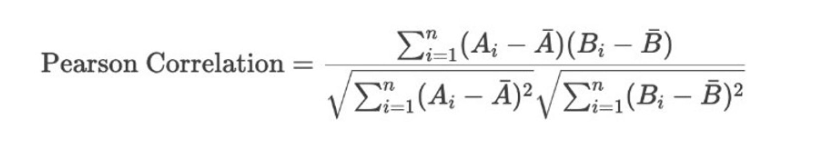

In [52]:
def compute_item_similarity(item_user_matrix):
    """
    Computes the Pearson similarity matrix for items in the item-user matrix using vectorized operations.

    item_user_matrix: pandas DataFrame of shape (num_items, num_users)
    """
    # Convert the DataFrame to a NumPy array for faster computation
    item_user_matrix_values = item_user_matrix.values

    # Subtract the mean of each item (movie) from the ratings to center them
    item_means = np.mean(item_user_matrix_values, axis=1, keepdims=True)
    centered_matrix = item_user_matrix_values - item_means

    # Compute the dot product of the centered matrix with its transpose to get covariance
    covariance_matrix = np.dot(centered_matrix, centered_matrix.T)

    # Compute the norms (standard deviations) for each item
    norms = np.linalg.norm(centered_matrix, axis=1)

    # Normalize the covariance matrix to get the Pearson correlation matrix
    similarity_matrix = covariance_matrix / (norms[:, None] * norms[None, :])

    # Convert similarity matrix to DataFrame for easier inspection
    similarity_df = pd.DataFrame(similarity_matrix, index=item_user_matrix.index, columns=item_user_matrix.index)

    return similarity_df

## >> Compute item-item similarity using Pearson correlation ...

In [53]:
item_item_similarity_df = compute_item_similarity(user_item_matrix_train.T)

In [54]:
item_item_similarity_df

movieId,1,2,3,4,5,6,7,8,9,10,...,190219,190221,193565,193567,193571,193579,193581,193583,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.155724,0.155430,-0.014459,0.100166,0.089710,0.137535,0.053797,0.133151,0.105608,...,-0.025569,-0.025569,-0.025569,-0.025569,-0.025569,-0.025569,-0.025569,-0.025569,-0.025569,-0.025569
2,0.155724,1.000000,0.107994,0.030378,0.143751,0.101398,0.088599,0.090310,-0.012350,0.207464,...,-0.016146,-0.016146,-0.016146,-0.016146,-0.016146,-0.016146,-0.016146,-0.016146,-0.016146,-0.016146
3,0.155430,0.107994,1.000000,0.080627,0.225810,0.167470,0.145816,0.200208,0.245117,0.078942,...,-0.010668,-0.010668,-0.010668,-0.010668,-0.010668,-0.010668,-0.010668,-0.010668,-0.010668,-0.010668
4,-0.014459,0.030378,0.080627,1.000000,0.082124,0.078172,0.189951,0.162374,-0.013578,0.033098,...,-0.003931,-0.003931,-0.003931,-0.003931,-0.003931,-0.003931,-0.003931,-0.003931,-0.003931,-0.003931
5,0.100166,0.143751,0.225810,0.082124,1.000000,0.109373,0.276385,0.181235,0.155994,0.074217,...,-0.009801,-0.009801,-0.009801,-0.009801,-0.009801,-0.009801,-0.009801,-0.009801,-0.009801,-0.009801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193579,-0.025569,-0.016146,-0.010668,-0.003931,-0.009801,-0.014795,-0.010764,-0.004059,-0.005672,-0.019053,...,-0.001642,-0.001642,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642
193581,-0.025569,-0.016146,-0.010668,-0.003931,-0.009801,-0.014795,-0.010764,-0.004059,-0.005672,-0.019053,...,-0.001642,-0.001642,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642
193583,-0.025569,-0.016146,-0.010668,-0.003931,-0.009801,-0.014795,-0.010764,-0.004059,-0.005672,-0.019053,...,-0.001642,-0.001642,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642




>  Plot a heatmap for the item-item similarity matrix



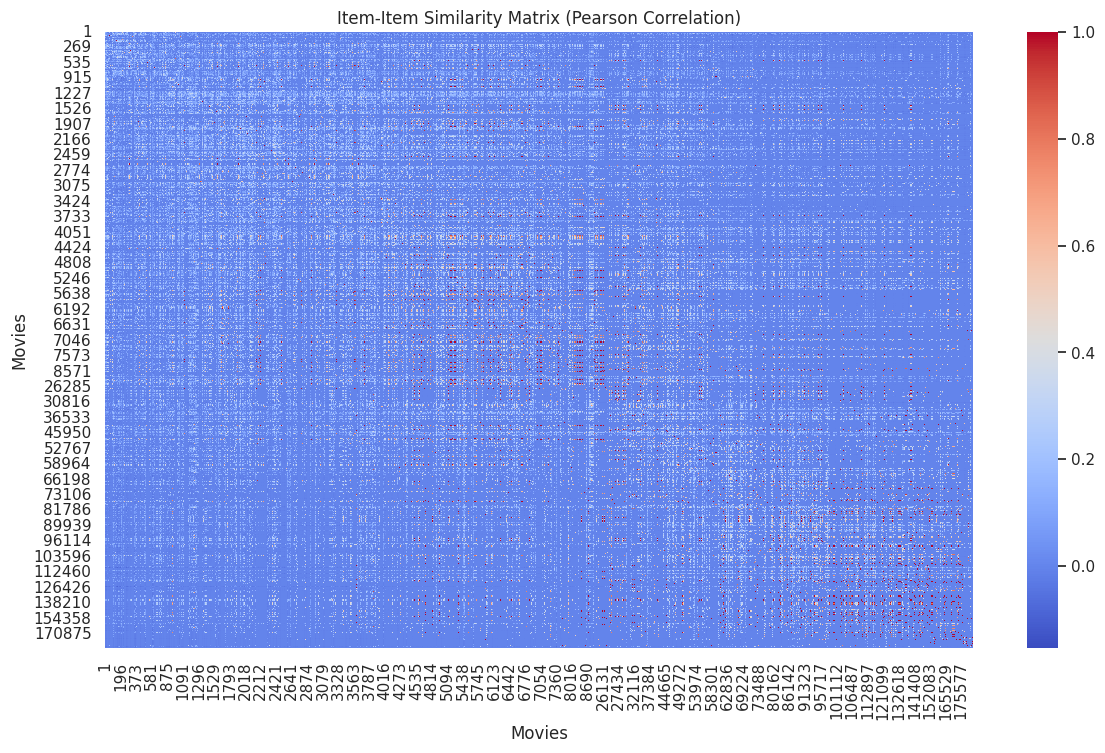

In [55]:
# Plot a heatmap for the item-item similarity matrix
plt.figure(figsize=(14, 8))
sns.heatmap(item_item_similarity_df, cmap='coolwarm', annot=False, cbar=True)

# Add titles and axis labels
plt.title('Item-Item Similarity Matrix (Pearson Correlation)')
plt.xlabel('Movies')
plt.ylabel('Movies')

# Save the heatmap as an image
plt.savefig('item_item_similarity_heatmap_pearson.png')
plt.show()



> Plot a heatmap for the item-item similarity matrix {only for first 50 to more clarity}



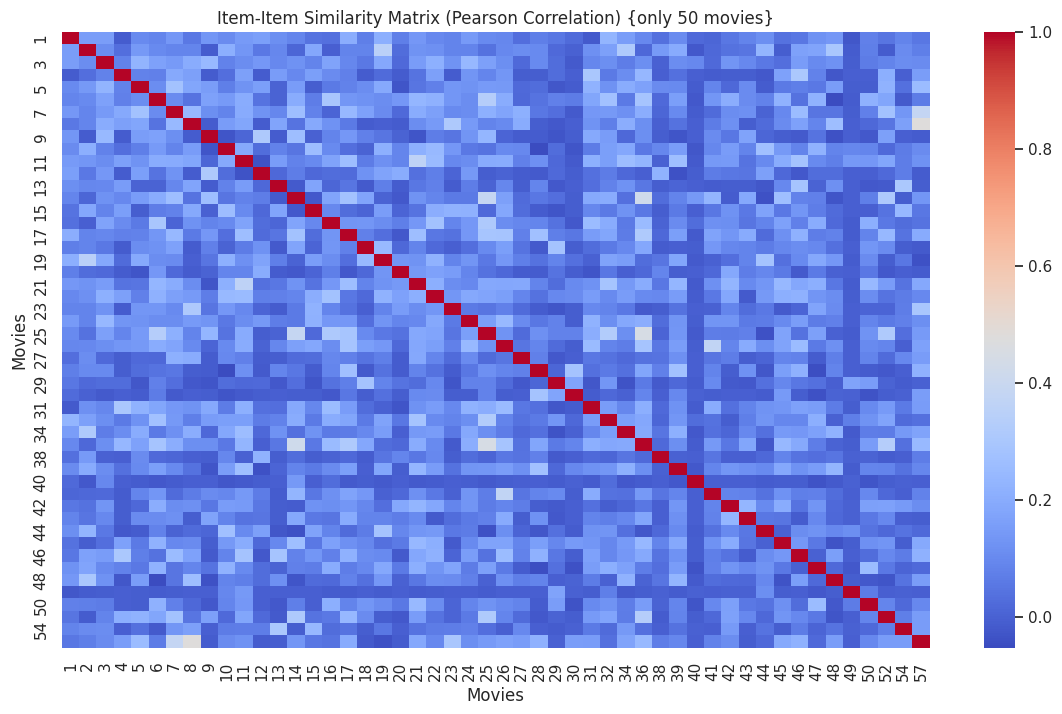

In [56]:
# Plot a heatmap for the item-item similarity matrix
plt.figure(figsize=(14, 8))
sns.heatmap(item_item_similarity_df.iloc[:50, :50], cmap='coolwarm', annot=False, cbar=True)

# Add titles and axis labels
plt.title('Item-Item Similarity Matrix (Pearson Correlation) {only 50 movies}')
plt.xlabel('Movies')
plt.ylabel('Movies')

# Save the heatmap as an image
plt.savefig('item_item_similarity_heatmap_pearson_50.png')
plt.show()

## >> Baseline (most rated films)


In [57]:
def top_n_movies_base_line(data=train_data, top_n=5):
    # Select columns
    relevant_data = data[['title', 'rating']]

    # Group by 'title' and calculate the mean rating
    grouped = relevant_data.groupby('title')['rating'].mean()

    # Get the top n movies by mean rating
    top_movies = grouped.nlargest(top_n)

    # Convert the result to a list of tuples
    return list(top_movies.items())



> test it ...!!!



In [58]:
top_n_movies_base_line(top_n=10)

[("'Salem's Lot (2004)", 5.0),
 ('12 Angry Men (1997)', 5.0),
 ('12 Chairs (1976)', 5.0),
 ('20 Million Miles to Earth (1957)', 5.0),
 ('3 Idiots (2009)', 5.0),
 ('7 Faces of Dr. Lao (1964)', 5.0),
 ('9/11 (2002)', 5.0),
 ('A Flintstones Christmas Carol (1994)', 5.0),
 ('A Perfect Day (2015)', 5.0),
 ('A Plasticine Crow (1981)', 5.0)]

## >> Recommend movies similar to a selected movie based on the top-5 similar items


note : we should use regex for better user experience ...

* movie_title (str):
 * The title of the movie to base recommendations on.
* user_id (int):
 * The ID of the user for whom the recommendations are made.
* user_item_matrix (pd.DataFrame):
 * The user-item rating matrix.
* similarity_matrix (pd.DataFrame):
 * The precomputed similarity matrix between items (movies).
* data (pd.DataFrame):
 * Movie metadata (e.g., movieId, title, genres).
* top_n (int):
 * Number of similar movies to consider (default 5).
* number_of_movies (int):
 * Number of recommendations to return (default 10).

* This function gives us a list of unrated movies that the user might like, sorted by predicted rating.
* The predicted rating is calculated using the user's previous ratings and the similarity between the target movie and those rated movies.

In [59]:
def item_based_cf(movie_title, user_id, user_item_matrix=user_item_matrix_train, similarity_matrix=item_item_similarity_df, data=train_data,top_n=5, number_of_movies=10):

    try:
        #Get the movieId for the given movie title
        movie_id = data.loc[data['title'] == movie_title, 'movieId'].values
        if len(movie_id) == 0:
            print(f"Movie '{movie_title}' not found in the dataset.")
            print("Returning base-line movies...")
            return top_n_movies_base_line(top_n=top_n)  # Assuming this function returns baseline recommendations

        movie_id = movie_id[0]  # Extract the movieId

        #Get the similarity scores for the target movie with all other movies
        movie_similarities = similarity_matrix.loc[movie_id]

        # Check if the user exists in the matrix
        if user_id not in user_item_matrix.index:
            print(f"User ID {user_id} not found in the dataset.")
            return []

        # Get the user's rated movies and filter out those already rated by the user
        user_rated_movies = user_item_matrix.loc[user_id]
        already_rated = user_rated_movies.dropna()[user_rated_movies > 0].index  # Drop NaNs and filter out 0 ratings

        # Remove already rated movies from the similarity list
        movie_similarities = movie_similarities.drop(already_rated, errors='ignore')

        # Get the top-n most similar movies (excluding the target movie)
        similar_movie_ids = movie_similarities.drop(movie_id, errors='ignore').nlargest(top_n).index

        # Calculate the predicted ratings for the unrated movies
        recommended_movies = []
        for similar_movie_id in similar_movie_ids:
            # Get the movie title
            similar_movie_title = data.loc[data['movieId'] == similar_movie_id, 'title'].values[0]

            # Get the ratings of the movies the user has already rated
            # and compute weighted rating based on similarity
            user_ratings_for_similar_movies = user_item_matrix.loc[user_id, already_rated]

            # Get the similarity scores for the rated movies with the similar movie
            similarities_for_rated_movies = similarity_matrix.loc[similar_movie_id, already_rated]

            #  Calculate the weighted sum of ratings (for prediction)
            weighted_ratings = user_ratings_for_similar_movies * similarities_for_rated_movies
            predicted_rating = weighted_ratings.sum() / similarities_for_rated_movies.sum()

            recommended_movies.append((similar_movie_title, predicted_rating))

        return recommended_movies

    except Exception as e:
        print(f"Error occurred: {e}")
        return []




> try to generate recommends using movie title





> Try a wrong title  (not in the data base)



In [60]:
item_based_cf(movie_title="Dark8454",user_id=15,top_n=10)

Movie 'Dark8454' not found in the dataset.
Returning base-line movies...


[("'Salem's Lot (2004)", 5.0),
 ('12 Angry Men (1997)', 5.0),
 ('12 Chairs (1976)', 5.0),
 ('20 Million Miles to Earth (1957)', 5.0),
 ('3 Idiots (2009)', 5.0),
 ('7 Faces of Dr. Lao (1964)', 5.0),
 ('9/11 (2002)', 5.0),
 ('A Flintstones Christmas Carol (1994)', 5.0),
 ('A Perfect Day (2015)', 5.0),
 ('A Plasticine Crow (1981)', 5.0)]



> Try a real title (in the data base)



In [61]:
item_based_cf(movie_title="Dark Knight, The (2008)",user_id=15,top_n=10)

[('WALL·E (2008)', 3.535660456351459),
 ('Batman Begins (2005)', 3.5231220823430514),
 ('Departed, The (2006)', 3.5854673945617077),
 ('Social Network, The (2010)', 3.458581445531892),
 ('Bourne Ultimatum, The (2007)', 3.494310449639571),
 ('Iron Man 2 (2010)', 3.374030198959302),
 ('Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
  3.5122725878165646),
 ('Lord of the Rings: The Return of the King, The (2003)', 3.5584866264455677),
 ('300 (2007)', 3.5343565203165053),
 ('Taken (2008)', 3.5107362716802784)]

## >> try to evaluate this for a real user



> check the top rated film for user 15 :



In [62]:
def top_rated_movies_for_user(user_id, data=train_data, top_n=5):
    # Filter the data for the given user_id
    user_ratings = data[data['userId'] == user_id]

    # Sort the ratings by score in descending order
    top_rated_movies = user_ratings.sort_values(by='rating', ascending=False).head(top_n)

    # Get the movie titles and ratings
    top_rated_movies_list = top_rated_movies[['title', 'rating']]

    return top_rated_movies_list

In [63]:
top_rated_movies_for_user(user_id=15)

,title,rating
34950,"Others, The (2001)",5.0
16229,Star Wars: Episode IV - A New Hope (1977),5.0
68541,Star Wars: Episode VII - The Force Awakens (2015),5.0
55960,Schindler's List (1993),5.0
68210,Gladiator (2000),5.0




> lets choose star wars to recomment on it



In [64]:
recommended_films = item_based_cf(movie_title="Star Wars: Episode IV - A New Hope (1977)",user_id=15,top_n=10,number_of_movies=10)
display(recommended_films)

[('Star Wars: Episode V - The Empire Strikes Back (1980)', 3.7122347546800167),
 ('Star Wars: Episode I - The Phantom Menace (1999)', 3.6458308195817106),
 ('Indiana Jones and the Last Crusade (1989)', 3.6107639960111784),
 ('Jaws (1975)', 3.713250736538723),
 ('Mars Attacks! (1996)', 3.633944951279581),
 ('Total Recall (1990)', 3.681613763429202),
 ('Princess Bride, The (1987)', 3.7947601711002985),
 ('E.T. the Extra-Terrestrial (1982)', 3.8196640578766328),
 ('X-Men (2000)', 3.576235903233364),
 ('RoboCop (1987)', 3.594776194753969)]

> evaluate :

In [65]:
evaluate_recommendations(user_id=15, recommended_movies=recommended_films, test_data=test_data, threshold=2.5)

{'userId': 15,
 'precision': 0.2,
 'recall': 0.09523809523809523,
 'true_positives': 2,
 'false_positives': 8,
 'false_negatives': 19,
 'sum_absolute_error': 2.106151481890781,
 'sum_squared_error': 2.3280953592625506}

> using another movie title with the same user

In [66]:
recommended_films = item_based_cf(movie_title="Others, The (2001)",user_id=15,top_n=10,number_of_movies=10)
display(recommended_films)

[('Ring, The (2002)', 3.528811665549364),
 ("Howl's Moving Castle (Hauru no ugoku shiro) (2004)", 3.5479768876864695),
 ('I Know What You Did Last Summer (1997)', 3.533949908011462),
 ('Hero (Ying xiong) (2002)', 3.5895883116205467),
 ('Shaun of the Dead (2004)', 3.5730950337525402),
 ('Phone Booth (2002)', 3.5399647058348664),
 ('Sleepy Hollow (1999)', 3.5958938591710994),
 ('American Psycho (2000)', 3.5150326359378203),
 ('Identity (2003)', 3.5370328683670818),
 ('Signs (2002)', 3.5962013643271495)]



> try to evaluate them




In [67]:
evaluate_recommendations(user_id=15, recommended_movies=recommended_films, test_data=test_data, threshold=2.5)

{'userId': 15,
 'precision': 0.1,
 'recall': 0.047619047619047616,
 'true_positives': 1,
 'false_positives': 9,
 'false_negatives': 20,
 'sum_absolute_error': 0.015032635937820338,
 'sum_squared_error': 0.00022598014323904755}

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍  :

</h1>

* as we see using different movies gives us different percision 20% to 10%

* its kinda low , as user-based did better than it !!!!

* that's why in evaluation we will use all rated movie to predict on
---


## 🎯 **Requirement 2.3: Implement Content-Based Filtering** 🔍
**Requirements:**

* Apply TF-IDF to transform the book genres into numerical vectors.
* Calculate the similarity of books using TF-IDF embeddings based on genre data.



## >> Apply TF-IDF Vectorizer to the genre column

### >>> Generate genre matrix

* preprocess the genre column (if needed ---> to make sure its in right format)
* get tfidf matrix and victorizer

In [68]:
# Generate the genre matrix (TF-IDF matrix)
def generate_genre_matrix(Movies_df):
    # Preprocess the genres by replacing "|" with " " (space)
    Movies_df['processed_genres'] = Movies_df['genres'].apply(lambda x: x.replace("|", " "))

    # TF-IDF vectorizer for genre column
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(Movies_df['processed_genres'])

    return tfidf_matrix, tfidf_vectorizer

> Generate our TF-IDF for our train data

In [69]:
# call generate_genre_matrix with our train data
genre_matrix,tfidf_vectorizer = generate_genre_matrix(Movies_df = movies)

> check every thing is right ...

In [70]:
movies['processed_genres']

,processed_genres
0,Adventure Animation Children Comedy Fantasy
1,Adventure Children Fantasy
2,Comedy Romance
3,Comedy Drama Romance
4,Comedy
...,...
9737,Action Animation Comedy Fantasy
9738,Animation Comedy Fantasy
9739,Drama
9740,Action Animation


In [71]:
genre_matrix.shape

(9742, 24)

In [72]:
# Get the feature names (genres) from the tfidf_vectorizer
genre_names = tfidf_vectorizer.get_feature_names_out()

# Print the genre names
print(genre_names)

['action' 'adventure' 'animation' 'children' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'fi' 'film' 'genres' 'horror' 'imax'
 'listed' 'musical' 'mystery' 'no' 'noir' 'romance' 'sci' 'thriller' 'war'
 'western']


In [73]:
#print our TF-IDF
display(genre_matrix)

<9742x24 sparse matrix of type '<class 'numpy.float64'>'
	with 23219 stored elements in Compressed Sparse Row format>

> we cant do it direct so lets just print a sample

In [74]:
# Get the indices of non-zero entries
non_zero_indices = genre_matrix.nonzero()

# Inspect the row and column indices, and the corresponding values
rows = non_zero_indices[0]
cols = non_zero_indices[1]
values = genre_matrix.data

# Display the first 100 non-zero entries
for i, (row, col, value) in enumerate(zip(rows, cols, values)):
    if i >= 50:
        break
    print(f"Document {row}, Term {tfidf_vectorizer.get_feature_names_out()[col]}: {value}")


Document 0, Term adventure: 0.41684567364693936
Document 0, Term animation: 0.5162254711770092
Document 0, Term children: 0.5048454681396087
Document 0, Term comedy: 0.26758647689140014
Document 0, Term fantasy: 0.482990142708577
Document 1, Term adventure: 0.5123612074824269
Document 1, Term children: 0.6205251727456431
Document 1, Term fantasy: 0.5936619434123594
Document 2, Term comedy: 0.5709154064399099
Document 2, Term romance: 0.8210088907493954
Document 3, Term comedy: 0.5050154397005037
Document 3, Term romance: 0.726240982959826
Document 3, Term drama: 0.46640480307738325
Document 4, Term comedy: 1.0
Document 5, Term action: 0.5493281743985543
Document 5, Term crime: 0.6359470441562757
Document 5, Term thriller: 0.5420423542868653
Document 6, Term comedy: 0.5709154064399099
Document 6, Term romance: 0.8210088907493954
Document 7, Term adventure: 0.6366993258087036
Document 7, Term children: 0.7711121633813997
Document 8, Term action: 1.0
Document 9, Term adventure: 0.62952170

## >> Similarity Calculation Function:

* This function will take an input genre from the user and compute the similarity between this input and the movies in the dataset. We'll use the TF-IDF vectorizer to transform the input and compute cosine similarity.



In [75]:
def compute_similarity(input_genre, tfidf_vectorizer, tfidf_matrix):
    # Preprocess the input genre (same preprocessing as in the data)
    input_genre_processed = input_genre.replace("|", " ")

    # Transform the input genre using the vectorizer
    input_tfidf = tfidf_vectorizer.transform([input_genre_processed])

    # Calculate cosine similarity between input genre and all movie genres
    similarities = cosine_similarity(input_tfidf, tfidf_matrix).flatten()   # convert it to 1-D

    return similarities

## >> Content-Based Recommendation Function:

* default :
 * recommend the top 5 books based on a given user's input book genre.
   * u can change it using top_n


    - input_genre: The genre string provided by the user (e.g., "Action|Comedy").
    - user_id: The ID of the user to personalize recommendations for.
    - user_item_matrix: The user-item ratings matrix.
    - data: DataFrame containing 'movieId', 'title', and 'genres'.
    - tfidf_matrix: The precomputed TF-IDF matrix for the movie genres.
    - tfidf_vectorizer: The fitted TF-IDF vectorizer used for transformation.
    - top_n: Number of similar movies to consider.
    - number_of_movies: Number of top recommendations to return.


* we get user_id here to return not watched movies (no more no less)

In [76]:
def content_based_cf(query_genre, user_id=None, Movies_df=movies, user_item_matrix=user_item_matrix_train, tfidf_vectorizer=tfidf_vectorizer, tfidf_matrix=genre_matrix, number_of_movies=10):
    try:
        # Compute similarity between the query and all movie genres
        similarities = compute_similarity(query_genre, tfidf_vectorizer, tfidf_matrix)

        # Get the user's rated movies
        if user_id in user_item_matrix.index:
            #print("##USER...Found....")
            user_rated_movies = user_item_matrix.loc[user_id]
            already_rated = user_rated_movies[user_rated_movies > 0].index  # Movies the user has rated  (Movies_Idx)
        else:
            print(f"##USER_id:{user_id}...NOT.Found....")
            already_rated = []

        # Get the top N movie indices based on similarity scores, excluding rated movies
        sorted_indices = similarities.argsort()[::-1]  # Sort in descending order
        top_movie_indices = [idx for idx in sorted_indices if Movies_df.iloc[idx]['movieId'] not in already_rated][:number_of_movies]

        # Retrieve the recommended movie titles
        recommended_movies = []
        for idx in top_movie_indices:
            movie_title = Movies_df.iloc[idx]['title']
            similarity_score = similarities[idx]
            recommended_movies.append((movie_title, similarity_score))

        return recommended_movies

    except Exception as e:
        print(f"Error occurred: {e}")
        return []


> Testing ....!

In [77]:
content_based_cf(query_genre="Sci-Fi  Mystery  Psychological Cyberpunk  Thriller  Dystopian",user_id=5,number_of_movies=10)

[('Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 0.9999999999999999),
 ('Stepford Wives, The (1975)', 0.9999999999999999),
 ('Narcopolis (2014)', 0.9999999999999999),
 ('District 9 (2009)', 0.9999999999999999),
 ('Seconds (1966)', 0.9999999999999999),
 ('Unforgettable (1996)', 0.9999999999999999),
 ('X-Files: I Want to Believe, The (2008)', 0.9644756218734531),
 ('Soylent Green (1973)', 0.9644756218734531),
 ('Moon (2009)', 0.9644756218734531),
 ('Forgotten, The (2004)', 0.9644756218734531)]

In [78]:
content_based_cf(query_genre="Action|Adventure",user_id=15)

[('MacGyver: Lost Treasure of Atlantis (1994)', 1.0),
 ('The Expendables 3 (2014)', 1.0),
 ('Kull the Conqueror (1997)', 1.0),
 ('Expendables 2, The (2012)', 1.0),
 ('Phantom, The (1996)', 1.0),
 ('Last Knights (2015)', 1.0),
 ('DOA: Dead or Alive (2006)', 1.0),
 ('Crippled Avengers (Can que) (Return of the 5 Deadly Venoms) (1981)', 1.0),
 ('American Ninja (1985)', 1.0),
 ("Let's Get Harry (1986)", 1.0)]

In [79]:
content_based_cf(query_genre="Action   el7a2ona bgd Adventure",user_id=None)

##USER_id:None...NOT.Found....


[('MacGyver: Lost Treasure of Atlantis (1994)', 1.0),
 ('The Expendables 3 (2014)', 1.0),
 ('Kull the Conqueror (1997)', 1.0),
 ('Expendables 2, The (2012)', 1.0),
 ('Phantom, The (1996)', 1.0),
 ('Last Knights (2015)', 1.0),
 ('DOA: Dead or Alive (2006)', 1.0),
 ('Crippled Avengers (Can que) (Return of the 5 Deadly Venoms) (1981)', 1.0),
 ('American Ninja (1985)', 1.0),
 ("Let's Get Harry (1986)", 1.0)]

# 🎯 **Requirement 3: Hyprid method** 🔍




* Approach for Hybrid Model:
 * Alpha: Weight for content-based filtering.
 * Beta: Weight for user-based filtering.
 * Gamma: Weight for item-based filtering.

---> The sum of the weights should be 1 (i.e., alpha + beta + gamma = 1).

    Explanation:
    Content-based filtering: We calculate the similarity of movies to the query genre using TF-IDF and cosine similarity.
    User-based CF: We calculate recommendations based on similar users (using cosine similarity between users).
    Item-based CF: We calculate recommendations based on the similarity of movies (using cosine similarity between items).
    We then combine the results from all three methods using a weighted sum of the individual scores.

  

In [80]:
def hybrid_recommend(user_id, query_genre,
                     user_item_matrix=user_item_matrix_train,
                     users_cosine_similarity_df=users_cosine_similarity_df,
                     item_item_similarity_df=item_item_similarity_df,
                     tfidf_vectorizer=tfidf_vectorizer,
                     tfidf_matrix=genre_matrix,
                     alpha=0.5, beta=0.3, gamma=0.2,
                     number_of_movies=10, epsilon=1e-10):
    try:
        # --- 1. Content-based filtering (based on genre similarity)
        content_based_scores = content_based_cf(query_genre, user_id,
                                                user_item_matrix=user_item_matrix,
                                                tfidf_vectorizer=tfidf_vectorizer,
                                                tfidf_matrix=tfidf_matrix,
                                                number_of_movies=number_of_movies)
        # Normalize content-based scores to the range [0, 5]
        content_based_scores_dict = {movie: ((score + 1) / 2) * 5 for movie, score in content_based_scores}

        # --- 2. User-based collaborative filtering
        user_based_scores = user_based_cf(user_id,
                                          user_item_matrix=user_item_matrix,
                                          similarity_matrix=users_cosine_similarity_df,
                                          number_of_movies=number_of_movies)
        user_based_scores_dict = {movie: score for movie, score in user_based_scores}

        # --- 3. Item-based collaborative filtering (using movie title instead of query_genre)
        #rated_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()  # Get movies rated by the user
        rated_movies = user_item_matrix.loc[user_id].sort_values(ascending=False).head(100).index.tolist()
        item_based_scores_dict = {}

        # Loop through each rated movie, and get similar movies using item-item similarity
        for movie in rated_movies:
            movie_title = movies.loc[movies['movieId'] == movie, 'title'].values[0]
            item_based_scores = item_based_cf(movie_title=movie_title,user_id=user_id,top_n=10,number_of_movies=number_of_movies)

            for recommended_movie, score in item_based_scores:
                if recommended_movie not in item_based_scores_dict:
                    item_based_scores_dict[recommended_movie] = [min(5,score)]  # Store as a list to aggregate later  ---># Cap at 5

                else:
                    item_based_scores_dict[recommended_movie].append(score)  # Add to existing list

        # --- Average item-based scores for each movie (no capping needed)
        for movie in item_based_scores_dict:
            # Aggregate scores for this movie and average them
            total_score = sum(item_based_scores_dict[movie])
            item_based_scores_dict[movie] = total_score / len(item_based_scores_dict[movie])  # Average score

        # --- Combine all three scores
        all_movies = set(content_based_scores_dict.keys()) | \
                     set(user_based_scores_dict.keys()) | \
                     set(item_based_scores_dict.keys())

        combined_scores = {}

        # Calculate the combined score based on weighted sum of all three approaches
        for movie in all_movies:
            # Get the scores for the movie, default to 0 if not found
            content_score = content_based_scores_dict.get(movie, 0)
            user_score = user_based_scores_dict.get(movie, 0)
            item_score = item_based_scores_dict.get(movie, 0)

            # Weighted sum of the three methods
            hybrid_score = alpha * content_score + beta * user_score + gamma * item_score

            # # Normalize by the number of methods that contributed (non-zero scores)
            # # This makes sure that if only one score is non-zero, it won't be penalized by the other weights
            denominator = (alpha * (content_score != 0)) + (beta * (user_score != 0)) + (gamma * (item_score != 0))
            # # Avoid division by zero by adding epsilon to the denominator
            hybrid_score_weighted = hybrid_score / (denominator + epsilon)

            combined_scores[movie] = [hybrid_score,hybrid_score_weighted]

        # Get top N movie recommendations based on the hybrid score
        top_movies = sorted(combined_scores.items(), key=lambda x: x[1][0], reverse=True)[:number_of_movies]



        # Return the movie titles and scores
        return [(movie, score[1]) for movie, score in top_movies]

    except Exception as e:
        print(f"Error occurred: {e}")
        return []


### get recommendation from everyone first to get intuition

In [81]:
# top movies for user 15 : baseline
top_rated_movies_for_user(user_id=15,top_n=5)

,title,rating
34950,"Others, The (2001)",5.0
16229,Star Wars: Episode IV - A New Hope (1977),5.0
68541,Star Wars: Episode VII - The Force Awakens (2015),5.0
55960,Schindler's List (1993),5.0
68210,Gladiator (2000),5.0


> user-based recommendation :

In [82]:
user_based_cf(user_id=15)

[('Braveheart (1995)', 4.098692625563315),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 3.570708205060367),
 ('Lord of the Rings: The Return of the King, The (2003)', 3.4555463701458167),
 ('V for Vendetta (2006)', 3.445019614938157),
 ('Jurassic Park (1993)', 3.3731848896484657),
 ('Indiana Jones and the Last Crusade (1989)', 3.1641374530198525),
 ('Monsters, Inc. (2001)', 3.156532877823064),
 ('WALL·E (2008)', 2.987256675862717),
 ('Fight Club (1999)', 2.754520778178784),
 ('Dark Knight, The (2008)', 2.6330981996513514)]

> item-based recommendation :

using one of his most ratings

In [83]:
item_based_cf(movie_title="Star Wars: Episode IV - A New Hope (1977)",user_id=15,top_n=10,number_of_movies=10)

[('Star Wars: Episode V - The Empire Strikes Back (1980)', 3.7122347546800167),
 ('Star Wars: Episode I - The Phantom Menace (1999)', 3.6458308195817106),
 ('Indiana Jones and the Last Crusade (1989)', 3.6107639960111784),
 ('Jaws (1975)', 3.713250736538723),
 ('Mars Attacks! (1996)', 3.633944951279581),
 ('Total Recall (1990)', 3.681613763429202),
 ('Princess Bride, The (1987)', 3.7947601711002985),
 ('E.T. the Extra-Terrestrial (1982)', 3.8196640578766328),
 ('X-Men (2000)', 3.576235903233364),
 ('RoboCop (1987)', 3.594776194753969)]

> content-based recommendation :

In [84]:
content_based_cf(query_genre="adventure sci-fi fantasy action romance",user_id=15,number_of_movies=10)

[('Shin Godzilla (2016)', 0.9300684306110806),
 ('Trip to the Moon, A (Voyage dans la lune, Le) (1902)', 0.9300684306110806),
 ('Krull (1983)', 0.9300684306110806),
 ('Marvel One-Shot: Agent Carter (2013)', 0.9300684306110806),
 ('Thunderbirds (2004)', 0.9300684306110806),
 ('Hellboy II: The Golden Army (2008)', 0.9300684306110806),
 ('Batman v Superman: Dawn of Justice (2016)', 0.9300684306110806),
 ('Starcrash (a.k.a. Star Crash) (1978)', 0.9300684306110806),
 ('Wolverine, The (2013)', 0.9300684306110806),
 ('Masters of the Universe (1987)', 0.9300684306110806)]

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍  Observations :

</h1>

* User-Based Collaborative Filtering (user-based_cf)
 * Top 10 Recommendations for user 15:


    Braveheart (1995) - 4.10
    Star Wars: Episode V - The Empire Strikes Back (1980) - 3.57
    Lord of the Rings: The Return of the King (2003) - 3.46
    V for Vendetta (2006) - 3.45
    Jurassic Park (1993) - 3.37
    Indiana Jones and the Last Crusade (1989) - 3.16
    Monsters, Inc. (2001) - 3.16
    WALL·E (2008) - 2.99
    Fight Club (1999) - 2.75
    Dark Knight, The (2008) - 2.63

* Insights:

  * The user-based recommendations largely focus on classic adventure and action films, with several films from the Star Wars and Lord of the Rings franchises, aligning with the user's possible preferences.
  * The ratings appear fairly high for films with action-adventure genres, reflecting a preference for more engaging and action-driven movies.

---


* Item-Based Collaborative Filtering (item-based_cf)
 * Top 10 Recommendations for user 15 based on the movie Star Wars: Episode IV - A New Hope (1977):


    Star Wars: Episode V - The Empire Strikes Back (1980) - 3.71
    Star Wars: Episode I - The Phantom Menace (1999) - 3.65
    Indiana Jones and the Last Crusade (1989) - 3.61
    Jaws (1975) - 3.71
    Mars Attacks! (1996) - 3.63
    Total Recall (1990) - 3.68
    Princess Bride, The (1987) - 3.79
    E.T. the Extra-Terrestrial (1982) - 3.82
    X-Men (2000) - 3.58
    RoboCop (1987) - 3.59


* Insights:

* The item-based recommendations focus on movies that are thematically and genre-wise close to Star Wars—action, adventure, sci-fi, and fantasy. There’s a strong emphasis on well-known adventure and sci-fi films like Indiana Jones




---


* Content-Based Filtering (content-based_cf)
  * Top 10 Recommendations for user 15 based on the genre query ("adventure sci-fi fantasy action romance"):



    Shin Godzilla (2016) - 0.93
    Trip to the Moon, A (Voyage dans la lune, Le) (1902) - 0.93
    Krull (1983) - 0.93
    Marvel One-Shot: Agent Carter (2013) - 0.93
    Thunderbirds (2004) - 0.93
    Hellboy II: The Golden Army (2008) - 0.93
    Batman v Superman: Dawn of Justice (2016) - 0.93
    Starcrash (a.k.a. Star Crash) (1978) - 0.93
    Wolverine, The (2013) - 0.93
    Masters of the Universe (1987) - 0.93


* Insights:

* The content-based recommendations strongly reflect the genre preferences for action, sci-fi, fantasy, and adventure films.

* All recommended movies have the same similarity score, likely due to the use of a genre-based approach where the genre match is high.
* This can be a limitation of content-based filtering when it only uses genre similarity.


---



### >>> now use our hyprid method using same user , query_genre

NOTE : --> its like saying , i am user 15 i need to get movies similar to what i watched(personal taste) cosider the genre to be "adventure sci-fi fantasy action romance" ....

In [85]:
hybrid_recommend(user_id=15, query_genre="adventure sci-fi fantasy action romance",alpha=0.3, beta=0.3, gamma=0.3, number_of_movies=10)

[('Wolverine, The (2013)', 4.119616878210716),
 ('Braveheart (1995)', 3.926230364167818),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 3.6414714792632803),
 ('Lord of the Rings: The Return of the King, The (2003)', 3.5070164977111893),
 ('V for Vendetta (2006)', 3.4966421391785225),
 ('Jurassic Park (1993)', 3.4941576030942993),
 ('Indiana Jones and the Last Crusade (1989)', 3.387450723950941),
 ('Monsters, Inc. (2001)', 3.360202899770482),
 ('WALL·E (2008)', 3.2614585655635118),
 ('Fight Club (1999)', 3.1715597016078143)]

### >>>  if beta = 1 and others  = 0 ---> we will get recommendations from only user based ... lets check it

In [86]:
user_based_cf(user_id=15)

[('Braveheart (1995)', 4.098692625563315),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 3.570708205060367),
 ('Lord of the Rings: The Return of the King, The (2003)', 3.4555463701458167),
 ('V for Vendetta (2006)', 3.445019614938157),
 ('Jurassic Park (1993)', 3.3731848896484657),
 ('Indiana Jones and the Last Crusade (1989)', 3.1641374530198525),
 ('Monsters, Inc. (2001)', 3.156532877823064),
 ('WALL·E (2008)', 2.987256675862717),
 ('Fight Club (1999)', 2.754520778178784),
 ('Dark Knight, The (2008)', 2.6330981996513514)]

In [87]:
recommended_movies = hybrid_recommend(user_id=15, query_genre="adventure sci-fi fantasy action romance",alpha=0, beta=1, gamma=0, number_of_movies=10)

display(recommended_movies)

[('Braveheart (1995)', 4.098692625153445),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 3.5707082047032963),
 ('Lord of the Rings: The Return of the King, The (2003)', 3.455546369800262),
 ('V for Vendetta (2006)', 3.445019614593655),
 ('Jurassic Park (1993)', 3.373184889311147),
 ('Indiana Jones and the Last Crusade (1989)', 3.164137452703439),
 ('Monsters, Inc. (2001)', 3.1565328775074106),
 ('WALL·E (2008)', 2.9872566755639913),
 ('Fight Club (1999)', 2.754520777903332),
 ('Dark Knight, The (2008)', 2.6330981993880416)]

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍  Insights :

</h1>


* Hybrid Model Insights :

* Top Recommendation:
  * The Wolverine (2013) –--> Likely influenced by content-based recommendations, as it wasn’t in user-based or item-based lists.

* Balanced Approach:
 * Retains key user-based picks like Braveheart (1995) and Lord of the Rings: The Return of the King, The (2003)
 * along with item-based favorites like Star Wars: Episode V - The Empire Strikes Back (1980).

* Diversity in Recommendations:
 * Includes animated films like Monsters, Inc. (2001) and WALL·E (2008), suggesting a broader genre coverage.

* Lower Predicted Scores: Hybrid model applies weighted average by alpha,beta and game leading to more moderate ratings compared to individual models.


    Conclusion:
     A well-rounded mix of different recommendation strategies but slightly influenced by content-based picks.
     May need fine-tuning to ensure strong user preferences aren’t diluted.



# 🎯 **Evaluate our models >>>** 🔍▶


## >> Evaluate user_based

In [88]:
result_user_based = evaluate_all_users(threshold=2.5,number_of_movies=10,model_type="user_based",recommended_movies_func=user_based_cf,debug=True)

#
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
#########

In [89]:
#make it as dataframe for better visualizations :
result_user_based_df = pd.DataFrame([result_user_based])
display(result_user_based_df)

,global_precision,global_recall,global_true_positives,global_false_positives,global_false_negatives,golbal_mse,global_mae
0,0.221967,0.0775,1354,4746,16117,4.31779,2.548199


## >> Evaluate item_based

In [90]:
result_item_based = evaluate_all_users(threshold=2.5,number_of_movies=10,model_type="item_based",recommended_movies_func=item_based_cf,debug=True,test_data= test_data)

#
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
#########

In [91]:
result_item_based_df = pd.DataFrame([result_item_based])
display(result_item_based_df)

,global_precision,global_recall,global_true_positives,global_false_positives,global_false_negatives,golbal_mse,global_mae
0,0.003563,0.869155,15185,4246926,2286,55.866952,23.568355


## >> Evaluate content_based

In [92]:
result_content_based = evaluate_all_users(threshold=2.5,number_of_movies=10,model_type="content_based",recommended_movies_func=content_based_cf,debug=True,test_data= test_data)

#
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
#########

In [93]:
result_content_based_df = pd.DataFrame([result_content_based])
display(result_content_based_df)

,global_precision,global_recall,global_true_positives,global_false_positives,global_false_negatives,golbal_mse,global_mae
0,0.028525,0.009959,174,5926,17297,3.231422,0.956157


## >> Evaluate Hyprid_method

In [94]:
result_hyprid_method = evaluate_all_users(threshold=2.5,number_of_movies=10,model_type="hybrid_model",recommended_movies_func=hybrid_recommend,debug=True,test_data= test_data)

#
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
##############################
#########

In [95]:
result_hyprid_method_df  =  pd.DataFrame([result_hyprid_method])
display(result_hyprid_method_df)

,global_precision,global_recall,global_true_positives,global_false_positives,global_false_negatives,golbal_mse,global_mae
0,0.199672,0.069716,1218,4882,16253,1.994184,1.666613


> combine them in one DF

In [104]:
model_names = ["user_based_cf", "item_based_cf", "content_based_cf", "hybrid_method"]
All_results = pd.concat([result_user_based_df,result_item_based_df,result_content_based_df,result_hyprid_method_df], axis=0, ignore_index=True)
All_results.index = model_names

print("All results: ")
display(All_results)

All results: 


,global_precision,global_recall,global_true_positives,global_false_positives,global_false_negatives,golbal_mse,global_mae
user_based_cf,0.221967,0.077500,1354,4746,16117,4.317790,2.548199
item_based_cf,0.003563,0.869155,15185,4246926,2286,55.866952,23.568355
content_based_cf,0.028525,0.009959,174,5926,17297,3.231422,0.956157
hybrid_method,0.199672,0.069716,1218,4882,16253,1.994184,1.666613


<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
     🔍  Insights :

</h1>

* Hybrid Model Key Insights:
* Best Accuracy:
 * Lowest MSE (1.99) and low MAE (1.67) → most stable predictions.
* Balanced Tradeoff:
 * Precision (0.1997) close to user-based, recall (0.0697) better than content-based.
* Controlled False Positives: 4,882
* True Positives:
 * 1,218, slightly below user-based but much better than content-based.
* Avoids Extremes:
 * Better recall than user-based, fewer false positives than item-based, and more relevant picks than content-based.
* Needs Improvement:
 * High false negatives (16,253) → recall tuning could enhance coverage.

# 🎯 **Collaborative Filtering Using SVD** 🔍


**NOT TESTED**

In [96]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505171 sha256=6bf1792aede1200fb68056fe7d8948b8a0b5bbff3e46505952095f59b9150e19
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [97]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy

In [111]:
user_item_matrix_train = train_data.pivot_table(index='userId', columns='movieId', values='rating', aggfunc='mean', fill_value=0)
user_item_matrix_test = test_data.pivot_table(index='userId', columns='movieId', values='rating', aggfunc='mean', fill_value=0)

In [118]:
def prepare_data_from_matrix(user_item_matrix_train, user_item_matrix_test):
    train_data = user_item_matrix_train.stack().reset_index(name='rating')
    test_data = user_item_matrix_test.stack().reset_index(name='rating')

    reader = Reader(rating_scale=(0, 5))
    train_data_surprise = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)
    test_data_surprise = Dataset.load_from_df(test_data[['userId', 'movieId', 'rating']], reader)

    return train_data_surprise, test_data_surprise

In [119]:
def train_svd_model(train_data_surprise):
    trainset = train_data_surprise.build_full_trainset()
    model = SVD()

    print("Training the SVD model...")
    for _ in tqdm(range(1), desc="Training Progress"):
        model.fit(trainset)

    return model, trainset

In [127]:
def evaluate_model(model, trainset, test_data_surprise, measures=['RMSE', 'MAE']):
    print("Performing cross-validation...")
    train_results = cross_validate(model, train_data_surprise, measures=measures, cv=5, verbose=True)

    print("Evaluating on test data...")
    testset = test_data_surprise.build_full_trainset().build_testset()

    # Add a progress bar to model evaluation
    test_predictions = []
    for pred in tqdm(model.test(testset), desc="Test Evaluation Progress", total=len(testset)):
        test_predictions.append(pred)

    test_rmse = accuracy.rmse(test_predictions)
    test_mae = accuracy.mae(test_predictions)

    eval_df = pd.DataFrame({
        'Metric': ['Train RMSE', 'Train MAE', 'Test RMSE', 'Test MAE'],
        'Value': [
            train_results['test_rmse'].mean(),
            train_results['test_mae'].mean(),
            test_rmse,
            test_mae
        ]
    })

    return eval_df

In [122]:
train_data_surprise, test_data_surprise = prepare_data_from_matrix(user_item_matrix_train, user_item_matrix_test)

In [123]:
model, trainset = train_svd_model(train_data_surprise)

Training the SVD model...


Training Progress: 100%|██████████| 1/1 [01:08<00:00, 68.56s/it]


In [129]:
def predict_ratings(model, test_data):
    # Generate predictions
    predictions = [model.predict(row['userId'], row['movieId']) for index, row in test_data.iterrows()]

    # Convert predictions to DataFrame
    predictions_df = pd.DataFrame({
        'userId': [pred.uid for pred in predictions],
        'movieId': [pred.iid for pred in predictions],
        'predicted_rating': [pred.est for pred in predictions]
    })

    return predictions_df

In [132]:
# Predict ratings for the filtered test data
predictions_df = predict_ratings(model, test_data)
print("Predicted Ratings:\n", predictions_df)

Predicted Ratings:
        userId  movieId  predicted_rating
0         318     2571          3.264297
1         288     3147          1.505632
2         314       23          0.152403
3         184   191005          0.028724
4         414     5415          0.227160
...       ...      ...               ...
20163     608     2009          0.611552
20164     305    94018          0.005797
20165     103      784          0.452775
20166      89   155589          0.105973
20167     608     2081          1.462171

[20168 rows x 3 columns]


In [138]:
test_data[["userId",  "movieId"  ,"rating"]]

,userId,movieId,rating
0,318,2571,3.5
1,288,3147,3.0
2,314,23,3.0
3,184,191005,4.5
4,414,5415,2.0
...,...,...,...
20163,608,2009,3.0
20164,305,94018,4.0
20165,103,784,3.0
20166,89,155589,3.0


In [139]:
eval_df = evaluate_model(model, trainset, test_data_surprise)

Performing cross-validation...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3901  0.3908  0.3919  0.3919  0.3893  0.3908  0.0010  
MAE (testset)     0.0886  0.0886  0.0888  0.0889  0.0890  0.0888  0.0002  
Fit time          126.73  112.42  113.60  111.93  111.21  115.18  5.83    
Test time         22.82   25.39   22.06   18.39   16.91   21.11   3.07    
Evaluating on test data...


Test Evaluation Progress: 100%|██████████| 3123200/3123200 [00:00<00:00, 5128869.32it/s]


RMSE: 0.3472
MAE:  0.1070
